# Q1. Train and evaluate a decision tree model on Iris database.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

/home/kaji/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
iris = load_iris()


In [3]:

X = iris.data[:, 2:]  # Petal length and width
y = iris.target
X.shape, y.shape

((150, 2), (150,))

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [5]:
clf = DecisionTreeClassifier()


In [6]:
param_grid = {
    'max_leaf_nodes': [3, 4, 5, 6, 7]
}

In [7]:
grid_searcher = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=-1)


In [8]:
grid_searcher.fit(X, y)


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_leaf_nodes': [3, 4, 5, 6, 7]})

In [9]:
grid_searcher.best_score_


0.9600000000000002

In [10]:
grid_searcher.best_score_


0.9600000000000002

In [11]:
grid_searcher.best_params_


{'max_leaf_nodes': 6}

In [12]:
clf = DecisionTreeClassifier(max_leaf_nodes=4)


In [13]:
# clf.score(X.shape, y.shape)


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((75, 2), (75,), (75, 2), (75,))

In [15]:
clf = DecisionTreeClassifier(max_leaf_nodes=4)


In [16]:
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_leaf_nodes=4)

In [17]:
clf.score(X_test, y_test)


0.9733333333333334

# Regression

In [18]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


In [19]:
X = np.linspace(start=0, stop=1, num=500)
y = (X-0.5)**2 + np.random.randn(500)/50.

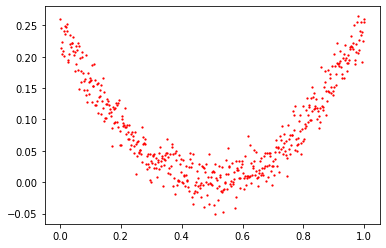

In [20]:
plt.scatter(X, y, s=1.5, c='red')


In [21]:
tree_reg = DecisionTreeRegressor(max_depth=2)


In [22]:
tree_reg.fit(X[..., None], y[..., None])


DecisionTreeRegressor(max_depth=2)

In [23]:
import sklearn
from sklearn.datasets import make_moons

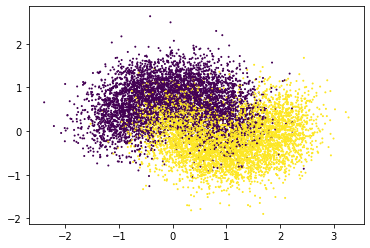

In [24]:
X, y = make_moons(n_samples=10000, noise=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
plt.show()



# Q2. Train and evaluate ensemble models on the HW2_Student_Scores_Database.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
dataset = pd.read_csv("/home/kaji/workSpace/hw2_student_scores.csv")

In [27]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)
train_set.shape, test_set.shape

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X=dataset, y=dataset['Gender']):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]
    
    strat_train_set['Gender'].value_counts()
# We can tell the ratio between Female and Male is still 3:2
# Let's separate X(the features/input) from y(the target/output)
# In chapter 2, variable names housing and housing_labels were used for X and y. 
# I prefer to use X and y, you can choose the names you like.
X = train_set.drop("Scores", axis=1)
y = train_set["Scores"].copy()
X.shape, y.shape

# Now, let's clean feture 'Hours'
from sklearn.impute import SimpleImputer
# I use median here, you can also use other options such as mean or 0
imputer = SimpleImputer(strategy='median')
X_num = X.drop("Gender", axis=1)
X_num.head()


imputer.fit(X_num)
X_num_tr = imputer.transform(X_num)
X_num_tr
# We can find no missing values any more

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
X_cat = X[['Gender']]
X_cat_1hot = one_hot_encoder.fit_transform(X_cat.values)
X_cat_1hot = X_cat_1hot.toarray()
X_cat_1hot

import numpy as np
X = np.c_[X_num_tr, X_cat_1hot]
X

# I chose linear regression as the model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
# train the model
lin_reg.fit(X=X, y=y)
# error on training set
from sklearn.metrics import mean_squared_error
y_hat = lin_reg.predict(X)
lin_mse = mean_squared_error(y, y_hat)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


# Now, let's try to test the model on test set
X = test_set.drop("Scores", axis=1)
y = test_set["Scores"].copy()

X_num = X.drop("Gender", axis=1)
# no need to fit here, we need to use the imputer fitted by the training set
# this is quite important. Do not change any part of the model when the training part is done.
X_num_tr = imputer.transform(X_num)

X_cat = X[['Gender']]
# use transform directly, no fit here
X_cat_1hot = one_hot_encoder.transform(X_cat.values)
X_cat_1hot = X_cat_1hot.toarray()

X = np.c_[X_num_tr, X_cat_1hot]

# lin_reg.fit(X=X, y=y)
# no fit here, use the model directly
y_hat = lin_reg.predict(X)
lin_mse = mean_squared_error(y, y_hat)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

num_attribs = ['Hours']
cat_attribs = ["Gender"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])


X = train_set.drop("Scores", axis=1)
y = train_set["Scores"].copy()


X = full_pipeline.fit_transform(X)

# train the model
lin_reg.fit(X=X, y=y)
# error on training set
from sklearn.metrics import mean_squared_error
y_hat = lin_reg.predict(X)
lin_mse = mean_squared_error(y, y_hat)
lin_rmse = np.sqrt(lin_mse)
print("train error: " ,lin_rmse)


# Now, let's try to test the model on test set
X = test_set.drop("Scores", axis=1)
y = test_set["Scores"].copy()

X = full_pipeline.transform(X)

y_hat = lin_reg.predict(X)
lin_mse = mean_squared_error(y, y_hat)
lin_rmse = np.sqrt(lin_mse)
print("test error: " ,lin_rmse)

train error:  9.950715779185371
test error:  7.3928091107176295


In [28]:
# dataset.head()

# Voting Hard

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X=dataset, y=dataset['Gender']):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [31]:
strat_train_set['Gender'].value_counts()
# We can tell the ratio between Female and Male is still 3:2

F    12
M     8
Name: Gender, dtype: int64

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33,random_state=42)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((3, 3), (3,), (2, 3), (2,))

In [33]:
log_clf = LogisticRegression(solver='lbfgs')
rf_clf = RandomForestClassifier(n_estimators=100)
svm_clf = SVC(gamma='scale')

In [34]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rf_clf), ('svc', svm_clf)], voting='hard')

In [35]:
voting_clf.fit(X, y)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [36]:
from sklearn.metrics import accuracy_score


In [37]:
for clf in [log_clf, rf_clf, svm_clf, voting_clf]:
    clf.fit(X, y)
    y_hat = clf.predict(X_val)
    print(clf.__class__.__name__, accuracy_score(y_val, y_hat))

LogisticRegression 0.5
RandomForestClassifier 0.5
SVC 1.0
VotingClassifier 1.0


In [38]:
from sklearn.metrics import accuracy_score


In [39]:
for clf in [log_clf, rf_clf, svm_clf, voting_clf]:
    clf.fit(X, y)
    y_hat = clf.predict(X_val)
    print(clf.__class__.__name__, accuracy_score(y_val, y_hat))

LogisticRegression 0.5
RandomForestClassifier 1.0
SVC 1.0
VotingClassifier 1.0


In [40]:
log_clf = LogisticRegression(solver='lbfgs')
rf_clf = RandomForestClassifier(n_estimators=100)
# You need to set probability=True for SVC classifier, because default value is False
svm_clf = SVC(gamma='scale',probability=True)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rf_clf), ('svc', svm_clf)],
                              voting='soft')

for clf in [log_clf, rf_clf, svm_clf, voting_clf]:
    clf.fit(X, y)
    y_hat = clf.predict(X_val)
    print(clf.__class__.__name__, accuracy_score(y_val, y_hat))

LogisticRegression 0.5
RandomForestClassifier 0.5
SVC 1.0
VotingClassifier 1.0


 # Bagging

In [41]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [42]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)

In [84]:
# bag_clf.fit(X, y)

# bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, 
#     max_samples=100, bootstrap=True, n_jobs=-1)

bag_clf.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=16,
                                                        splitter='random'),
                  n_estimators=500, n_jobs=-1)

In [86]:
# y_hat = bag_clf.predict(X_val)

y_hat = bag_clf.predict(X_val)

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=0.63, bootstrap=True, n_jobs=-1, oob_score=True)

In [87]:
# bag_clf.oob_decision_function_
bag_clf.fit(X_train, y_train)



BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.63,
                  n_estimators=500, n_jobs=-1, oob_score=True)

In [91]:
bag_clf.oob_score_
y_hat = bag_clf.predict(X_val)
accuracy_score(y_val, y_hat)


bag_clf.oob_decision_function_


array([[0.        , 0.51351351, 0.48648649],
       [0.49408284, 0.50591716, 0.        ],
       [0.50759878, 0.        , 0.49240122]])

 # Boosting   AdaBoost

In [46]:
from sklearn.ensemble import AdaBoostClassifier


In [47]:

ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), 
                             n_estimators=200, algorithm='SAMME.R', 
                             learning_rate=0.5)

In [48]:
ada_clf.fit(X, y)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [49]:
from sklearn.metrics import accuracy_score


In [50]:
accuracy_score(ada_clf.predict(X_val), y_val)


0.5

In [51]:
accuracy_score(ada_clf.predict(X), y)


0.8

In [52]:
X = np.linspace(start=0, stop=1, num=500)
y = (X-0.5)**2 + np.random.randn(500)/50.
X = X[..., None]  # 1 feature

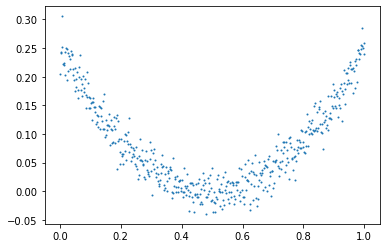

In [53]:
plt.scatter(X.squeeze(), y.squeeze(), s=1)
plt.show()

# Random Forests¶


In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)


In [66]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [72]:
rnd_clf.fit(X_test, y_test)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [81]:
# y_pred_rf = rnd_clf.predict(X_val)
y_pred_rf = rnd_clf.predict(X_test)
# y_pred_rf = rnd_clf.predict(y_test)




In [82]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter='random', max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1
)